In [167]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
# Read the file
with open("/content/names.txt", "r") as f:
    names = f.read().splitlines()

In [7]:
# Check the first 10 names of the dataset
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(names)

32033

In [13]:
# Check the shortest name
print(f"Shortest name length: {min(len(n) for n in names)}")

# Check the longest name
print(f"Longest name length: {max(len(n) for n in names)}")

Shortest name length: 2
Longest name length: 15


In [23]:
c = dict()
c[11] = c.get(11, 0)
c

{11: 0}

In [26]:
# Make biagram
b = dict()
for name in names:
    chs = ["<S>"] + list(name) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1

In [31]:
sorted(b.items(), key = lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [69]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [70]:
# Extract the unique values of the data
chars = sorted(list(set("".join(names))))

In [71]:
# Create the lookup tables
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi["."] = 0

itos = {i+1: s for i, s in enumerate(chars)}
itos[0] = "."

In [73]:
# Make biagram
for name in names:
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1, idx2] += 1

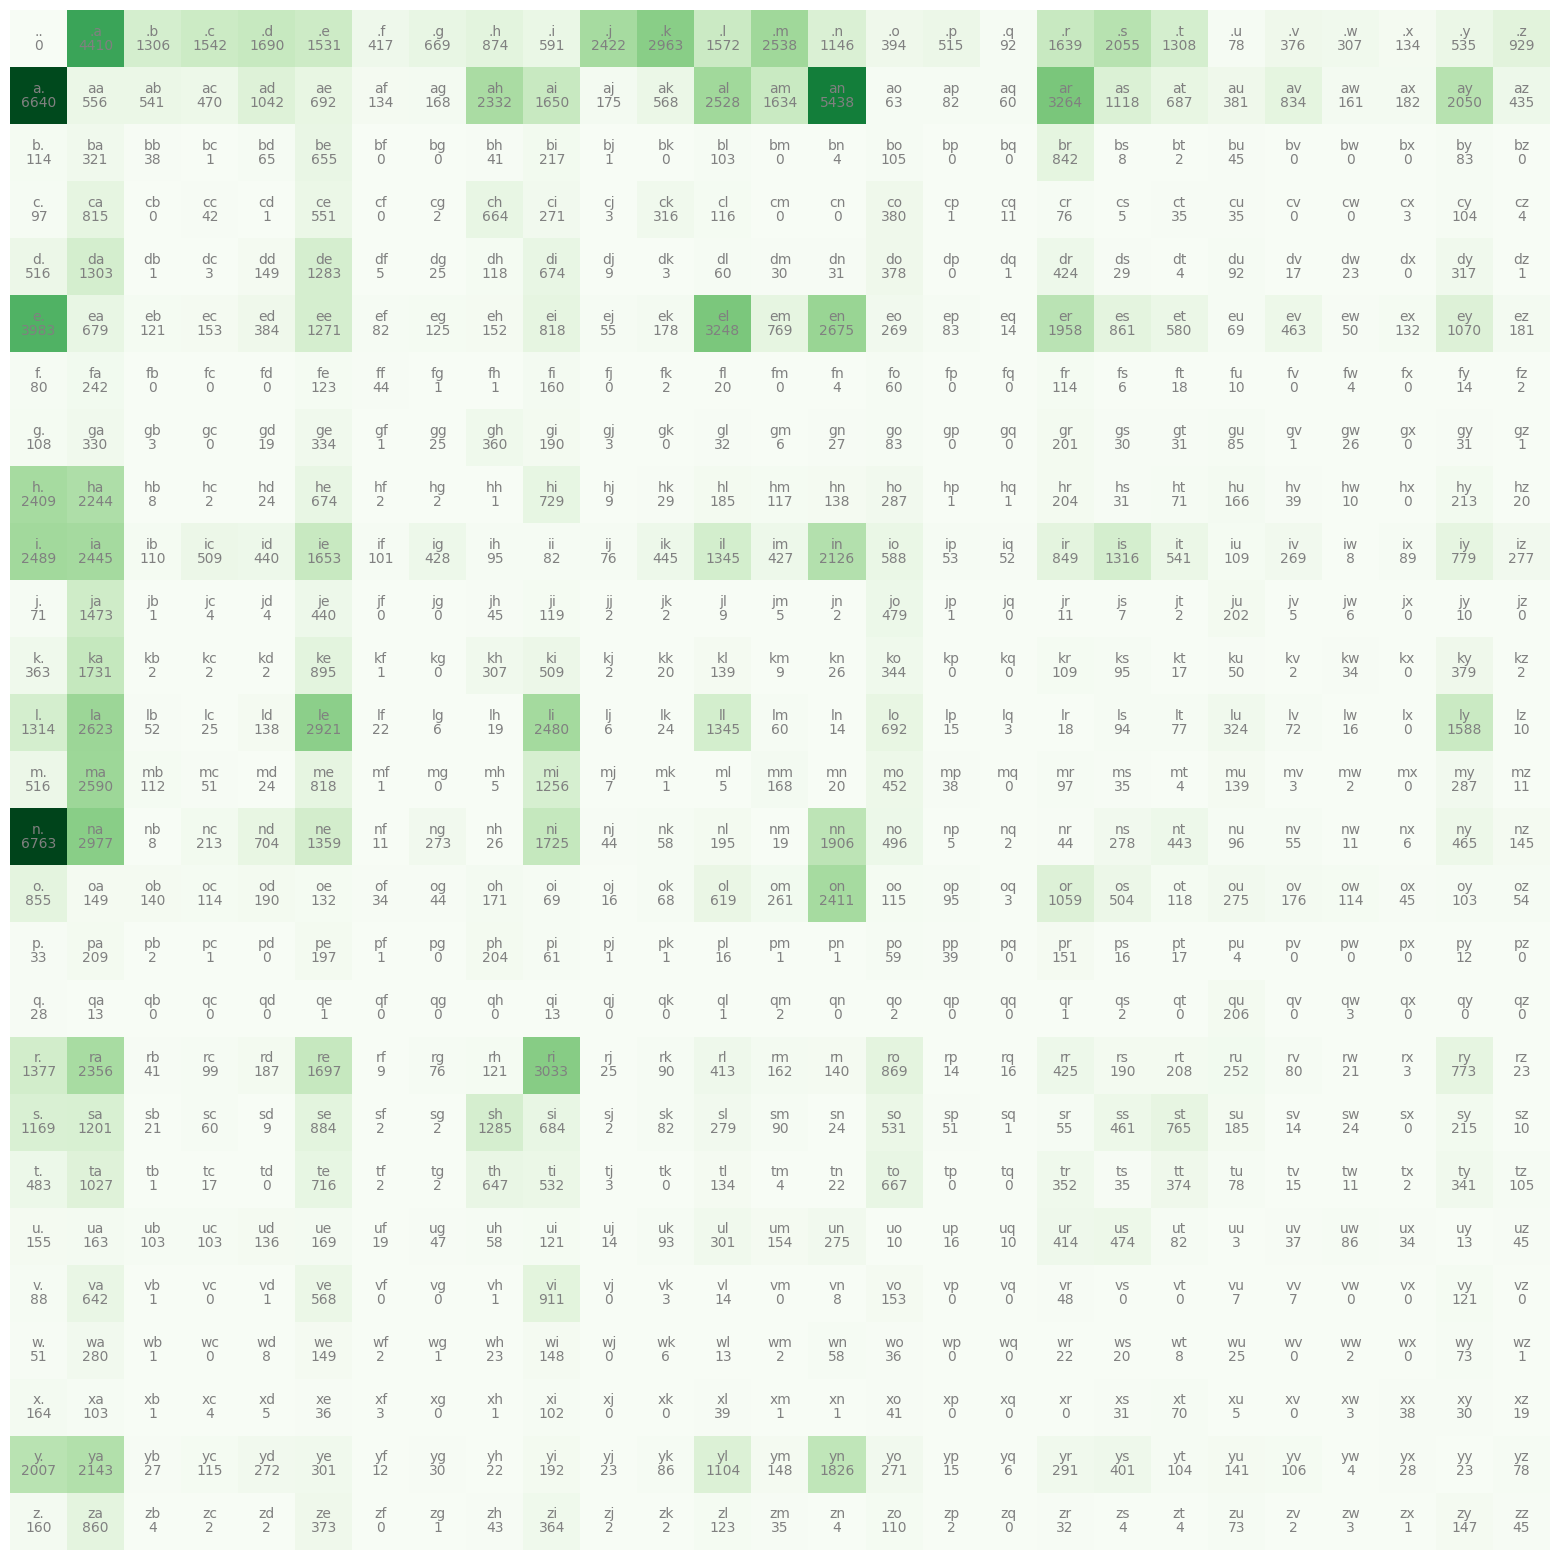

In [75]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap="Greens")
for i in range(27):
    for j in range(27):
        ch_str = itos[i] + itos[j]
        plt.text(j, i, ch_str, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")
plt.show()

In [147]:
P = (N + 1).float() # add one to not have a inf nll
P /= torch.sum(P, dim=1, keepdim=True)

In [148]:
g = torch.Generator().manual_seed(512)

for i in range(10):
    ix = 0
    output = list()
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        output.append(itos[ix])
        if ix == 0:
            break
    print(''.join(output))

amer.
cakeran.
misreritindamand.
ayzhin.
bllore.
brilaikielan.
aeyanico.
ayanuffga.
joudasaimalazrivy.
dabriyceya.


In [150]:
# Calculate the likelihood
log_likelihood = 0.0
n = 0

for name in names:
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"Average nll: {nll/n:.4f}")

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
Average nll: 2.4544


In [153]:
F.one_hot(torch.tensor(3), num_classes=5)

tensor([0, 0, 0, 1, 0])

In [ ]:
#

In [164]:
names[:1]

['emma']

In [165]:
xs, ys = [], []

for name in names[:1]:
    chs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [166]:
print(xs)

tensor([ 0,  5, 13, 13,  1])
